## Importing Data

Let's import the libraries that will be used...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from subprocess import call
from IPython.display import Image

In [2]:
df = pd.read_csv("heart_disease.csv")

In [3]:
df.head(10)

,age,sex,chest pain type,resting blood pressure,cholestrol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1190 non-null   int64  
 1   sex                     1190 non-null   int64  
 2   chest pain type         1190 non-null   int64  
 3   resting blood pressure  1190 non-null   int64  
 4   cholestrol              1190 non-null   int64  
 5   fasting blood sugar     1190 non-null   int64  
 6   resting ecg             1190 non-null   int64  
 7   max heart rate          1190 non-null   int64  
 8   exercise angina         1190 non-null   int64  
 9   oldpeak                 1190 non-null   float64
 10  ST slope                1190 non-null   int64  
 11  target                  1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


## Data Analysis

Let's check the features and plot some graphs to understand them better...

### Parameters:

age: age in years

sex: 1 = male; 0 = female

chest pain type: 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic

resting blood pressure: in mm Hg on admission to the hospital

cholestrol: serum cholestoral in mg/dl

fasting blood sugar: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

resting ecg: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

max heart rate: maximum heart rate achieved

exercise angina: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

target: 0 = normal,  1 = heart disease

*More info here: https://archive.ics.uci.edu/ml/datasets/heart+disease, https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive*

In [5]:
df.corr()['target'].sort_values()

max heart rate           -0.413278
cholestrol               -0.198366
resting ecg               0.073059
resting blood pressure    0.121415
fasting blood sugar       0.216695
age                       0.262029
sex                       0.311267
oldpeak                   0.398385
chest pain type           0.460127
exercise angina           0.481467
ST slope                  0.505608
target                    1.000000
Name: target, dtype: float64

[0.07732534 0.05814488 0.12906507 0.07765104 0.09469685 0.03543888
 0.03961733 0.09774854 0.14184567 0.09011231 0.15835409]


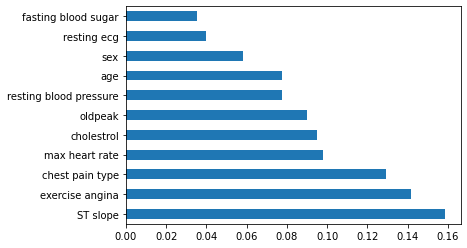

In [6]:
X = df.iloc[:,0:11] 
Y = df.iloc[:,-1]
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [7]:
df_pic = df.copy()
def tag(prob):
    if prob == 0:
        return "Normal"
    else:
        return "Heart Disease"
df_pic['target'] = df['target'].apply(tag)

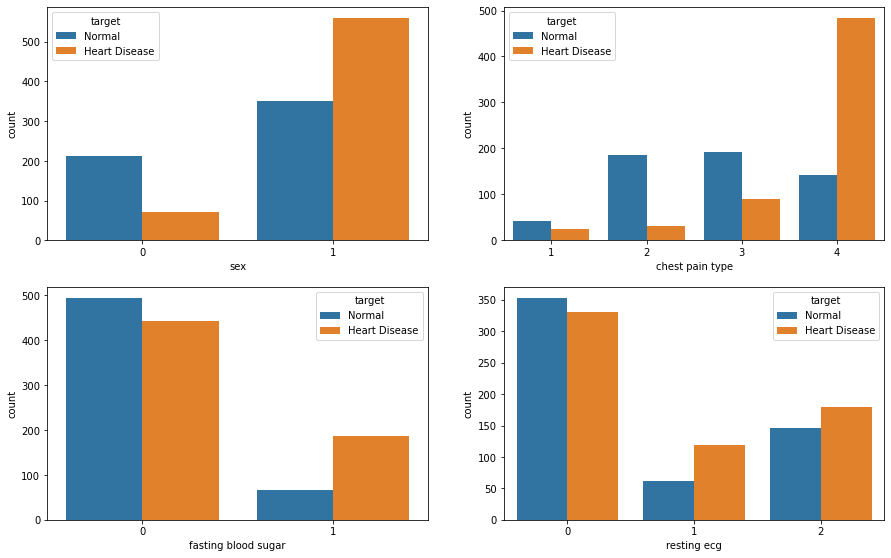

In [8]:
fig=plt.figure(figsize=(15,30))

fig.add_subplot(6,2,1)
sns.countplot(x='sex',hue='target',data=df_pic)

fig.add_subplot(6,2,2)
sns.countplot(x='chest pain type',hue='target',data=df_pic)

fig.add_subplot(6,2,3)
sns.countplot(x='fasting blood sugar', hue='target',data=df_pic)

fig.add_subplot(6,2,4)
sns.countplot(x='resting ecg',hue='target',data=df_pic)

plt.show()

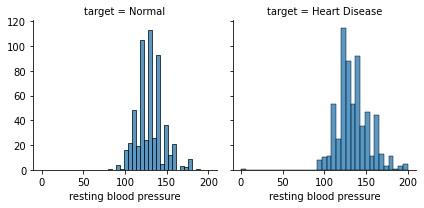

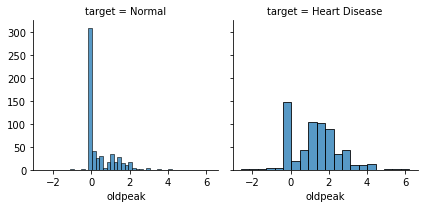

In [9]:
g1 = sns.FacetGrid(df_pic, col='target')
g1.map(sns.histplot, 'resting blood pressure')

g2 = sns.FacetGrid(df_pic, col='target')
g2.map(sns.histplot, 'oldpeak')

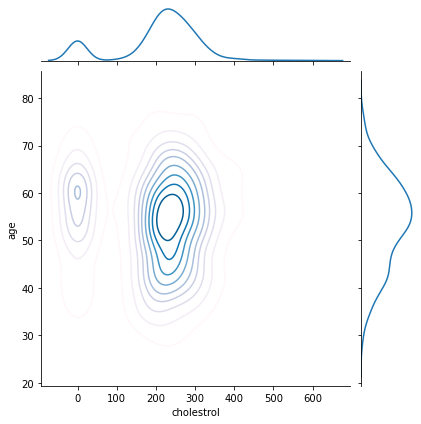

In [10]:
sns.jointplot(data=df_pic,
              x='cholestrol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

<AxesSubplot:xlabel='exercise angina', ylabel='max heart rate'>

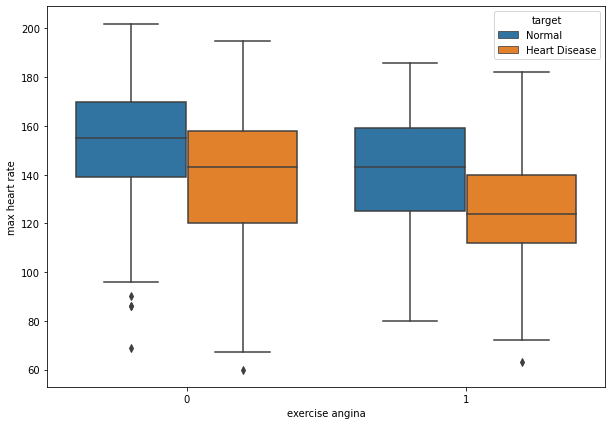

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_pic,x='exercise angina',y='max heart rate',hue='target')

<AxesSubplot:xlabel='target', ylabel='ST slope'>

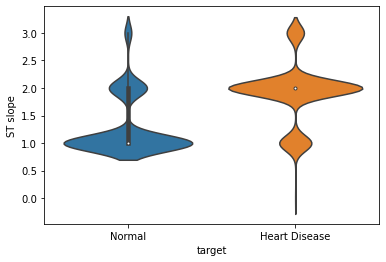

In [12]:
sns.violinplot(data=df_pic,x='target',y='ST slope')

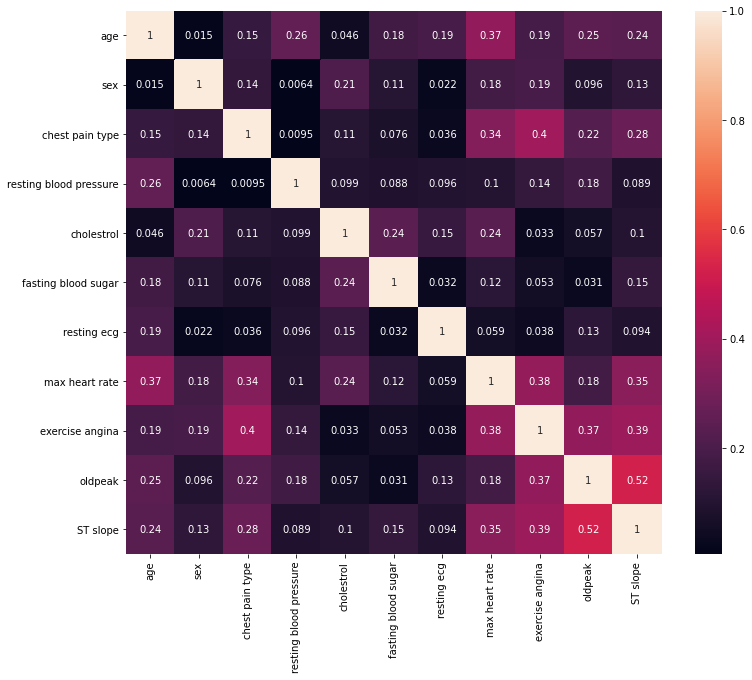

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df_pic.corr()), annot=True) #Shows the features correlation. ps: there's a bug on matplotlib #3.1.1.
plt.show()

From the above graph, we see that *oldpeak* have a strongest affect on the output.  
Later, after building some models like *Decision Tree* or *Random Forest*, we can check the models importance to check if they match with this result.

## Spliting the data

I'll be using *Cross-validation* to test some models.  
Although the *Cross-validation* is a good measure, I think is a good idea to separe 20% of the dataset as a unseen data to test the model...

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis =1), df['target'], test_size=0.2, random_state=2)

In [15]:
X_train.head()

,age,sex,chest pain type,resting blood pressure,cholestrol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
1155,40,1,4,152,223,0,0,181,0,0.0,1
361,62,1,3,160,0,0,0,72,1,0.0,2
20,43,0,1,100,223,0,0,142,0,0.0,1
471,53,1,4,126,0,0,0,106,0,0.0,2
845,58,0,1,150,283,1,2,162,0,1.0,1


In [16]:
X_train.shape

(952, 11)

In [17]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [18]:
X_train.head()

,age,sex,chest pain type,resting blood pressure,cholestrol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
1155,0.244898,1.0,1.000000,0.76,0.369818,0.0,0.0,0.852113,0.0,0.295455,0.333333
361,0.693878,1.0,0.666667,0.80,0.000000,0.0,0.0,0.084507,1.0,0.295455,0.666667
20,0.306122,0.0,0.000000,0.50,0.369818,0.0,0.0,0.577465,0.0,0.295455,0.333333
471,0.510204,1.0,1.000000,0.63,0.000000,0.0,0.0,0.323944,0.0,0.295455,0.666667
845,0.612245,0.0,0.000000,0.75,0.469320,1.0,1.0,0.718310,0.0,0.409091,0.333333


## Checking if dataset is balanced

If the train dataset (*X_train* and *y_train*) is perfectly balanced, as the target is wether 0 or 1, we should expect the mean equal to 0.5 (50%)...

In [19]:
y_train.mean()

0.5336134453781513

## Balancing the data

As we can se the dataset isn't balanced, let's balance it using the *SMOTE*, an Over-sampling technique...

In [20]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=1)

X_train_balanced, y_train_balanced = cc.fit_resample(X_train, y_train)

F:\ntu-anaconda\lib\site-packages\imblearn\under_sampling\_prototype_generation\_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (438) found smaller than n_clusters (444). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


In [21]:
X_train_balanced.shape

(888, 11)

In [22]:
X_test.shape

(238, 11)

In [23]:
y_train_balanced.mean()

0.5

## Building some Models

Let's try out some models and see the *Cross-validation* results for each one of them.  
I'll be using an arbitrary *random_state* value in an attempt to get the same results everytime a run the same model...

In [24]:
dt = DecisionTreeClassifier(random_state=2)

print('CV score:', cross_val_score(dt, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.8220720720720721


In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=2)

print('CV score:', cross_val_score(rf, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.8806306306306307


In [26]:
lr = LogisticRegression(random_state=2, solver='lbfgs', max_iter=1500) 

print('CV score:', cross_val_score(lr, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.8344594594594595


In [27]:
svm = SVC(gamma='auto',random_state=2)

print('CV score:', cross_val_score(svm, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.8322072072072073


## Hyperparameters Tuning (Random Forest)

From the above scores, we can see that the best models were *Random Forest* and *Logistic Regression*.  
So let's try to tune their hyperparameters to get better scores...

In [28]:
rf_grid = RandomForestClassifier(random_state=2) # creates a new estimator

# Create the parameter grid based on the results of random search 
rf_param_grid = {'criterion' : ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [1, 2, 3, 5, 10],
              'n_estimators': [50,100, 300, 500]}

# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
rf_grid_search = GridSearchCV(estimator=rf_grid, param_grid=rf_param_grid, cv=3, scoring='precision', n_jobs=-1, verbose=2)

rf_grid_search.fit(X_train_balanced, y_train_balanced)
rf_grid_search.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


F:\ntu-anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.90327873 0.89402628
 0.89495646 0.89102679 0.89500735 0.89355362 0.90014368 0.8976742
 0.89407262 0.89232665 0.89752331 0.89743835 0.88707639 0.89208904
 0.89029652 0.88818426        nan        nan        nan        nan
 0.88829789 0.8916566  0.89499251 0.8971096  0.88829789 0.8916566
 0.89499251 0.8971096  0.89013975 0.88704313 0.8890821  0.88892246
 0.88034242 0.88204115 0.88691662 0.88759124        nan        nan
        nan        nan 0.89016289 0.8920886  0.88566218 0.88879643
 0.89016289 0.8920886  0.88566218 0.88879643 0.89016289 0.8920886
 0.88566218 0.88879643 0.8821968  0.88798621 0.89325817 0.89196005
        nan        nan        nan        nan 0.89985414 0.89171811
 0.89426347 0.89394545 0.8890821  0.89402194 0.89784483 0.8973571
 0.88630323 0.89127754 0.89808943 0.89582271 0.88403963 0.88964073

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [29]:
rf_best_grid = rf_grid_search.best_estimator_
rf_best_grid # Note that it's a classifier

RandomForestClassifier(n_estimators=50, random_state=2)

In [30]:
X_train_balanced_rf = X_train_balanced
y_train_balanced_rf = y_train_balanced
digits = load_digits()
print (X_train_balanced_rf.shape)

(888, 11)


In [31]:
print('CV score:', cross_val_score(rf_grid, X_train_balanced_rf, y_train_balanced_rf, cv = 3).mean())

CV score: 0.8806306306306307


## Hyperparameters Tuning (Logistic Regression)

In [32]:
lr_grid = LogisticRegression(random_state=2)

# Create the parameter grid based on the results of random search 
lr_param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'C': [1, 2, 3, 4, 5],
              'max_iter': [1000, 1500, 2000],
              'multi_class': ['ovr', 'multinomial']}

# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
lr_grid_search = GridSearchCV(estimator=lr_grid, param_grid=lr_param_grid, cv=3, scoring='precision', n_jobs=-1, verbose=2)

lr_grid_search.fit(X_train_balanced, y_train_balanced)
lr_grid_search.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


{'C': 5, 'max_iter': 1000, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

In [33]:
lr_best_grid = lr_grid_search.best_estimator_
lr_best_grid # Note that it's a classifier

LogisticRegression(C=5, max_iter=1000, multi_class='multinomial',
                   random_state=2, solver='newton-cg')

In [34]:
print('CV score:', cross_val_score(lr_best_grid, X_train_balanced, y_train_balanced, cv = 3).mean())

CV score: 0.8400900900900901


## Evaluation Results

In [35]:
print('RF Test Score:', rf_best_grid.score(X_test, y_test))
print('LR Test Score:', lr_best_grid.score(X_test, y_test))

RF Test Score: 0.8277310924369747
LR Test Score: 0.7815126050420168


In [36]:
best_model = rf_best_grid

Making the predictions (only for visualization)...

In [37]:
y_trainP =best_model.predict(X_train_balanced_rf)
y_testP = best_model.predict(X_test)

accuracy_score(y_test,y_testP)

0.8277310924369747

In [38]:
results = pd.DataFrame()
results['Prediction']=y_testP
results['Real']=list(y_test)
results['Status']=['Right' if y_testP[n] == list(y_test)[n] else 'Wrong' for n in range(len(y_testP))]

results.head(10)

,Prediction,Real,Status
0,1,1,Right
1,1,1,Right
2,0,1,Wrong
3,1,1,Right
4,0,0,Right
5,0,0,Right
6,1,1,Right
7,0,1,Wrong
8,1,0,Wrong
9,0,1,Wrong


F:\ntu-anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


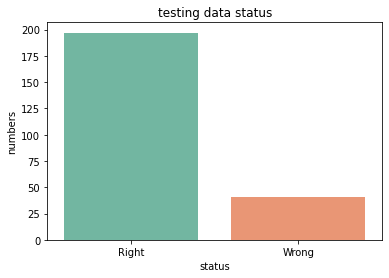

In [39]:
sns.countplot(results['Status'],palette="Set2")
plt.title('testing data status')
plt.xlabel('status')
plt.ylabel('numbers')
plt.show()

This report shows the final model precision...

[[103  27]
 [ 14  94]]


<AxesSubplot:>

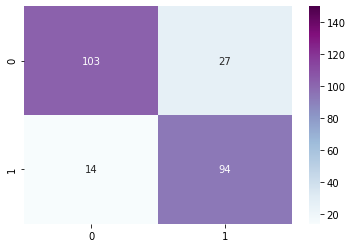

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_testP,y_test))
sns.heatmap(confusion_matrix(y_testP,y_test),vmax=150,cmap='BuPu',annot=True,fmt='.20g')

In [41]:
print(classification_report(y_testP,y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       130
           1       0.78      0.87      0.82       108

    accuracy                           0.83       238
   macro avg       0.83      0.83      0.83       238
weighted avg       0.83      0.83      0.83       238



0.8286006922370559

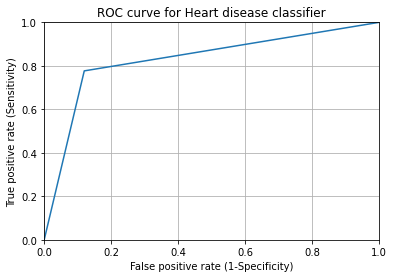

In [42]:
import sklearn
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_testP )
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
sklearn.metrics.roc_auc_score(y_test,y_testP)

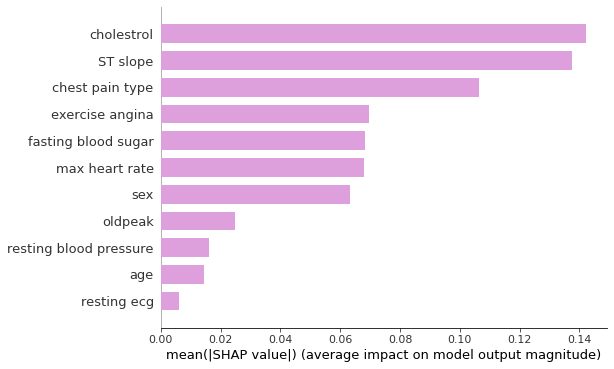

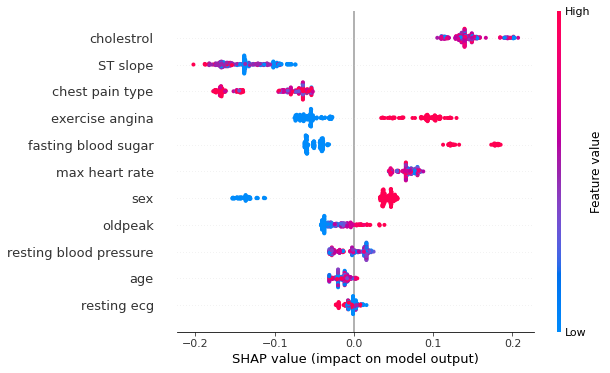

In [43]:
!pip install shap 
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,check_additivity=False)
shap.summary_plot(shap_values[1], X_test, plot_type="bar",color='plum')
shap.summary_plot(shap_values[1], X_test)

In [44]:
def patient_analysis(model, patient):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(patient)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [45]:
patients = X_test.iloc[6,:].astype(float)
patients_target = y_test.iloc[6:7]
print('Target : ',int(patients_target))
patient_analysis(model, patients)

Target :  1


In [46]:
patients = X_test.iloc[100,:].astype(float)
patients_target = y_test.iloc[100:101]
print('Target : ',int(patients_target))
patient_analysis(model, patients)

Target :  0
